In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [2]:
# Load training and validation sets
ds_train_ = image_dataset_from_directory(
    '../../../datasets/Computer_Vision/input/car-or-truck/train',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=True
)

ds_valid_ = image_dataset_from_directory(
    '../../../datasets/Computer_Vision/input/car-or-truck/valid',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=True
)

# Data Pipeline
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE

ds_train = (
    ds_train_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)


ds_valid = (
    ds_valid_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

Found 5117 files belonging to 2 classes.
Found 5051 files belonging to 2 classes.


In [3]:
import tensorflow_hub as hub

pretrained_base = tf.keras.models.load_model(
    '../../../datasets/Computer_Vision/input/cv-course-models/inceptionv1'
)

In [4]:
pretrained_base.trainable = False

In [5]:
import tensorflow.keras as keras
import tensorflow.keras.layers as layers

model = keras.Sequential([
    pretrained_base,
    layers.Flatten(),
    layers.Dense(6, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [6]:
optimizer = tf.keras.optimizers.Adam(epsilon=0.01)
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

In [8]:
history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=30
)

Epoch 1/30
80/80 [==============================] - 62s 772ms/step - loss: 0.5657 - binary_accuracy: 0.7119 - val_loss: 0.4450 - val_binary_accuracy: 0.8046

<AxesSubplot:>

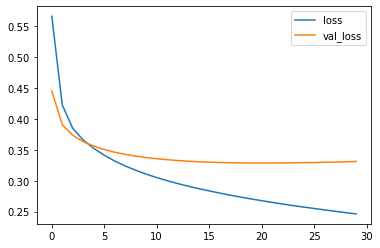

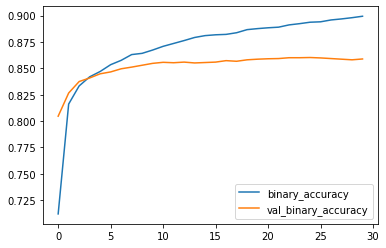

In [9]:
import pandas as pd

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot()